In [17]:
%config Completer.use_jedi = False

In [112]:
# 한글폰트 지정
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family='gulim')

### 데이터로드

In [22]:
## 데이터 로드 함수

import PyPDF2

def extract_text_from_pdf(pdf_path):
    
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        num_pages = len(reader.pages)

        text = ''
        for page_number in range(num_pages):
            page = reader.pages[page_number]
            text += page.extract_text()

    return text

In [291]:
import pandas as pd

documents = []

for i in [1,2,3]:
    pdf_file_path = f'./pdf_{i}.pdf'
    # print(pdf_file_path)
    documents.append(extract_text_from_pdf(pdf_file_path))

df = pd.DataFrame()
df['documents'] = documents
df

,documents
0,OPEN ACCESS\n딥러닝 기반의 BERT 모델을 활용한 \n학술 문헌 자동분...
1,한국어 기술문서 분석을 위한 \nBERT 기반의 분류모델 \nBERT-based C...
2,JKSCI한국컴퓨터정보학회논문지\nJournal of The Korea Societ...


### 데이터 전처리

In [94]:
# import re

# new_documents = []
# for doc in documents:
#     rm_special_char = re.sub('[-=+,#/\n\d\?:^.@*\"※~ㆍ!』‘<\>|\(\)\[\]`\'…》\”\“\’·]', '', doc)
#     rm_not_korean = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', rm_special_char).strip().replace(' ','')
#     new_documents.append(rm_not_korean)

In [104]:
# # from hanspell import spell_checker : 문자 인식을 못해서 사용 불가

# # https://github.com/haven-jeon/PyKoSpacing
# # !pip install git+https://github.com/haven-jeon/PyKoSpacing.git
# from pykospacing import Spacing

# spacing = Spacing()
# kospacing_sent = spacing(new_documents[0])
# print(kospacing_sent)

딥러닝 기반의 모델을 활용한 학술문헌 자동분류 김인후 김성희 초록본연구에서는 한국어 데이터로 학습된 모델을 기반으로 문헌정보학 분야의 문서를 자동으로 분류하여 성능을 분석하였다 이를 위해 문헌정보학 분야의 개학술지의 개 논문의 초록 데이터를 학습된 데이터의 크기에 따라서 자동분류의 성능에 어떠한 차이가 있는지를 분석 평가하였다 성능 평가 척도는 정확률 재현율 척도를 사용하였다 평가 결과 데이터의 양이 많고 품질이 높은 주제 분야들은 척도가 이상으로 높은 수준 의 성능을 보였다 반면에 데이터 품질이 낮고 내용적으로 다른 주제 분야들과 유사도가 높고 주제적으로 확실히 구별되는 자질이 적을 경우 유의미한 높은 수준의 성능평가가 도출되지 못하였다 이러한 연구는 미래 학술문헌에서 지속적으로 활용할 수 있는 사전학습 모델의 활용 가능성을 제시하기 위한 기초자료로 활용될 수 있을 것으로 기대한 다 키워드 자동분류 딥러닝 모델 트랜스포머 자연어 처리 본 연구는 석사학위 논문을 수정요약한 것 임중앙대학교 문헌정보학과 대학원 석사과정 제 저자 중앙대학교 문헌정보학과 교수 교신저자 논문 접수 일자년월일 최초 심사 일자 년월일 게재 확정일자년월일 정보관리학회 지정보관리학회지제권 제호서론 최근 들어 텍스트를 비롯한 다양한 유형의 데이터가 기하급수적으로 증가하고 빅데이터 기술과 기계학습 기술의 발전으로 문서의 자동분류에 관한 연구도 활발히 진행되어 왔다 차 산업혁명의 중심에 있는 인공지능 기술 중에서 기계학습을 비롯한 다양한 분류 알고리즘이 문서의 자동분류에 적용되어 왔다 김판준은 로치오 알고리즘 나이브베이즈 렌덤포레스트 등의 다양한 알고리즘을 이용하여 분류의 성능을 높이고자 시도하였다 또한 알고리즘 및 로지스틱 회귀의사결정 트리의 방법 등을 자동 분류에 활용하여 비교하는 연구들도 진행되어 왔다 배성호 외이상 우외특히 자연어 처리 분야에서 많은 연구가 이루어졌고 인상적인 성과들을 보여주고 있는데 문서에 내재된 의미를 이해하고 요약하는 자연어 처리 분야에서 딥러닝 기반의 모델들이 괄목할

In [ ]:
# 주요단어 치환 로직 필요함
# 예. BERT > 버트
# 아니면 영어와 함께 분석할 수 있는 방안 모색

In [294]:
## 전처리 함수1

import re
from pykospacing import Spacing

def text_preprocessing(df, col):
    
    new_documents = []
    spacing = Spacing()
    
    for doc in df[col]:
        rm_special_char = re.sub('[-=+,#%#/\n\d\?:^.@*\"※~ㆍ!』‘<\>|\(\)\[\]`\'…》\”\“\’·]', '', doc)
#         rm_not_korean = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]', '', rm_special_char).strip().replace(' ','')
        new_documents.append(spacing(rm_special_char))
    
    return new_documents

In [295]:
text_preprocessing(df, col='documents')

['OPEN ACCESS 딥러닝 기반의 BERT 모델을 활용한 학술 문헌 자동분류 A utom atic Class ification of A cademic A rticles Using BERT Model Bas ed on Deep Learning 김인후 In hu Kim 김성희 Seong hee Kim 초 록 본 연구에서는 한국어 데이터로 학습된 BERT 모델을 기반으로  문헌 정보학 분야의 문서를 자동으로 분류하여 성능을 분석하였다 이를 위해 문헌 정보학 분야의 개 학술지의 개 논문의 초록 데이터를 학습된 데이터의 크기에 따라서 자동분류의 성능에 어떠한 차이가 있는지를 분석 평가하였다 성능 평가 척도는 정확률 Precis ion 재현율 Recall F 척도를 사용하였다 평가 결과 데이터의 양이 많고 품질이 높은 주제 분야들 은 F 척도가 이상으로 높은 수준의 성능을 보였다 반면에 데이터 품질이 낮고 내용적으로 다른 주제 분야들과 유사도가 높고 주제적으로 확실히 구별되는 자질이 적을 경우 유의미한 높은 수준의 성능 평가가 도출되지 못하였다 이러한 연구는 미래 학술 문헌에서 지속적으로 활용할 수 있는 사 전 학습 모델의 활용 가능성을 제시하기 위한 기초 자료로 활용될 수 있을  것으로 기대한 다 ABSTRACTI n this study we analyz ed the performance of the BERTbas ed do cument class ification model by autom atically class ifying documents in the field of library and inform ation science base d on the KoBERT F or this purpose abstrac t data of papers in journals in the field of library and inform ation science were analyz ed and evalu ated for any difference in the perfor

In [296]:
df['new_documents'] = text_preprocessing(df, col='documents')
df

,documents,new_documents
0,OPEN ACCESS\n딥러닝 기반의 BERT 모델을 활용한 \n학술 문헌 자동분...,OPEN ACCESS 딥러닝 기반의 BERT 모델을 활용한 학술 문헌 자동분류 A ...
1,한국어 기술문서 분석을 위한 \nBERT 기반의 분류모델 \nBERT-based C...,한국어 기술문서 분석을 위한 BERT 기반의 분류 모델 BERTbas ed Clas...
2,JKSCI한국컴퓨터정보학회논문지\nJournal of The Korea Societ...,JKSCI 한국컴퓨터 정보학회 논문지 Jou rnal of The Korea Soc...


In [304]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 불용어 사전 정의
stopwords_df = pd.read_csv('../crawling/stopwords.csv', encoding='cp949',usecols=[0])

row = ['은', '는', '이', '가', '을', '를', '들', '의', '것', '좀', '잘', '도', '으로','위해',
       '만일','다시','에', '수', '및', '등', '듯', '개', '이상', '그', '때', '몇몇','대한',
       '지난','통해','반드시','한편','만일','얼마','다른','지난','올해','내년','도록','이제',
       '위해','항상','확인','예전','간단','지금','필자','당시','충분','이론','대신','보통',
       '힘껏','더욱','원활','측은','현재','매일','라든지','었는데','그동안','오히려'
      ]
row_df = pd.DataFrame(row, columns=['stopwords'])

new_stopwords = stopwords_df.append(row_df, ignore_index=True)
stopwords = list(set(new_stopwords['stopwords']))   # 중복 제거 후 고유 요소만 남김
# stopwords_en = stopwords.words('english')


# 사용자 사전 정의
add_dic = ['홀로렌즈', '메타버스', '테크핀', '인슈어테크', '딥페이크', '스미싱', '프로슈머', '마이데이터', 'DB','AI','AR','VR',
           '메가픽셀', '홀로그램', '지오펜싱', '핀테크', '해커톤','디지털트윈', '디지털화폐', '사물정보통신','디지털화폐', 'IT',
           '웹3.0', '인공지능', '큐브위성', '클라우드', '화이트박스', '인플레이션', '블록체인','상호운용성', '증강현실',
           '머신러닝','딥러닝','자율주행','데이터레이크','인플레이스','평가']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
## 전처리 함수2

# from tqdm import tqdm
from ckonlpy.tag import Twitter

def tokenized(df, col):
    twitter = Twitter()
    
    nouns = []
    for new_doc in df[col]:
        tokenized_doc = [noun for noun in twitter.nouns(new_doc) if len(noun) >= 3] # 3글자 미만 제거
        nouns.append(tokenized_doc)
        
    df['tokenized'] = nouns
    
    return df

def tokenized_option(df, col, stopword, user_dict):
    twitter = Twitter()
    twitter.add_dictionary(user_dict, 'Noun')
    
    nouns = []
    for new_doc in df[col]:
        tokenized_doc = [noun for noun in twitter.nouns(new_doc) if len(noun) >= 3] # 3글자 미만 제거
        stopwords_rm_doc = [word for word in tokenized_doc if not word in stopword] # 불용어 제거
        nouns.append(stopwords_rm_doc)
    
    df['tokenized_op'] = nouns
    
    return df

In [298]:
def tokenized_ko_en(df, col, stopword, user_dict):
    twitter = Twitter()
    twitter.add_dictionary(user_dict, 'Noun')
    
    nouns_ko = []
    nouns_en = []
    for new_doc in df[col]:
        tokenized_doc_ko = [noun for noun in twitter.nouns(new_doc) if len(noun) >= 3] # 3글자 미만 제거
        stopwords_rm_doc = [word for word in tokenized_doc_ko if not word in stopword] # 불용어 제거
        nouns_ko.append(stopwords_rm_doc)
        
        tokenized_doc_en = [word for word, pos in twitter.pos(new_doc) if pos=='Alpha'] 
        stopwords_en_rm_doc = [word for word in tokenized_doc_en if not word in stopwords.words('english')] # 불용어 제거
        nouns_en.append(stopwords_en_rm_doc) 
    
#     df['tokenized_ko_op'] = nouns
    
    return nouns_ko, nouns_en

In [299]:
tokenized_ko_en(df, col='new_documents', 
                 stopword = stopwords, 
                 user_dict = add_dic)

AttributeError: 'list' object has no attribute 'words'

In [147]:
tokenized(df, col='new_documents')

C:\Users\heo\AppData\Roaming\Python\Python37\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


,documents,new_documents,tokenized
0,OPEN ACCESS\n딥러닝 기반의 BERT 모델을 활용한 \n학술 문헌 자동분...,딥러닝 기반의 모델을 활용한 학술문헌 자동분류 김인후 김성희 초록본연구에서는 한국어...,"[김인후, 김성희, 한국어, 데이터, 문헌정보학, 문헌정보학, 학술지, 데이터, 데..."
1,한국어 기술문서 분석을 위한 \nBERT 기반의 분류모델 \nBERT-based C...,한국어 기술문서 분석을 위한 기반의 분류 모델 황상흠 김도현 초록최근 들어 기술개발...,"[한국어, 김도현, 융합과학, 트렌드, 텍스트, 텍스트, 따라서, 로부터, 텍스트,..."
2,JKSCI한국컴퓨터정보학회논문지\nJournal of The Korea Societ...,한국컴퓨터 정보학회 논문지 요약최근 신경망 기반의 학습 알고리즘 인 딥러닝 기술의 ...,"[컴퓨터, 신경망, 알고리즘, 텍스트, 임베딩, 텍스트, 데이터, 임베딩, 텍스트,..."


In [153]:
tokenized_option(df, col='new_documents', 
                 stopword = stopwords, 
                 user_dict = add_dic)

,documents,new_documents,tokenized,tokenized_op
0,OPEN ACCESS\n딥러닝 기반의 BERT 모델을 활용한 \n학술 문헌 자동분...,딥러닝 기반의 모델을 활용한 학술문헌 자동분류 김인후 김성희 초록본연구에서는 한국어...,"[김인후, 김성희, 한국어, 데이터, 문헌정보학, 문헌정보학, 학술지, 데이터, 데...","[딥러닝, 김인후, 김성희, 한국어, 데이터, 문헌정보학, 문헌정보학, 학술지, 데..."
1,한국어 기술문서 분석을 위한 \nBERT 기반의 분류모델 \nBERT-based C...,한국어 기술문서 분석을 위한 기반의 분류 모델 황상흠 김도현 초록최근 들어 기술개발...,"[한국어, 김도현, 융합과학, 트렌드, 텍스트, 텍스트, 따라서, 로부터, 텍스트,...","[한국어, 김도현, 융합과학, 트렌드, 텍스트, 텍스트, 텍스트, 딥러닝, 임베딩,..."
2,JKSCI한국컴퓨터정보학회논문지\nJournal of The Korea Societ...,한국컴퓨터 정보학회 논문지 요약최근 신경망 기반의 학습 알고리즘 인 딥러닝 기술의 ...,"[컴퓨터, 신경망, 알고리즘, 텍스트, 임베딩, 텍스트, 데이터, 임베딩, 텍스트,...","[컴퓨터, 신경망, 알고리즘, 딥러닝, 텍스트, 임베딩, 텍스트, 데이터, 임베딩,..."


### 탐색

In [247]:
def tokenizer_twitter(documents, stopword=stopwords, user_dict=add_dic):
    twitter = Twitter()
    twitter.add_dictionary(user_dict, 'Noun')
    
    tokenized_doc = [noun for noun in twitter.nouns(documents) if len(noun) >= 3] # 3글자 미만 제거
    stopwords_removed_doc = [word for word in tokenized_doc if not word in stopword] # 불용어 제거
        
    return(stopwords_removed_doc)

In [248]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer=tokenizer_twitter, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df=1,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

In [279]:
X = vectorize.fit_transform(df['new_documents'])
X.toarray()

array([[0.1090462 , 0.12634714, 0.0519611 , 0.1090462 , 0.        ,
        0.0519611 , 0.08797779, 0.1090462 , 0.        , 0.        ,
        0.        , 0.0519611 , 0.0519611 , 0.1090462 , 0.        ,
        0.08797779, 0.0519611 , 0.        , 0.        , 0.06690938,
        0.09040722, 0.12399448, 0.0519611 , 0.0519611 , 0.1090462 ,
        0.08797779, 0.10311913, 0.0519611 , 0.0519611 , 0.0519611 ,
        0.0519611 , 0.12399448, 0.094301  , 0.        , 0.        ,
        0.03951776, 0.0519611 , 0.        , 0.        , 0.0519611 ,
        0.1090462 , 0.08293245, 0.        , 0.08797779, 0.0519611 ,
        0.17735588, 0.        , 0.0519611 , 0.19267437, 0.        ,
        0.        , 0.12399448, 0.0800812 , 0.12262528, 0.        ,
        0.0519611 , 0.        , 0.        , 0.06690938, 0.        ,
        0.        , 0.        , 0.0519611 , 0.0519611 , 0.03951776,
        0.        , 0.        , 0.20762264, 0.16001117, 0.        ,
        0.14506289, 0.0519611 , 0.        , 0.08

In [250]:
# Term Freqeuncy
tfidf = pd.DataFrame(X.toarray(), columns = vectorize.get_feature_names_out())
tfidf.head()

,가까이,가능성,게임학,경영정보,고도화,고학년,공통점,공황장애,과학기술,과학기술대,...,필요성,하이퍼,학술지,학습원,한국어,합성곱,해찬솔,형태소,훈련기,희소성
0,0.109046,0.126347,0.051961,0.109046,0.000000,0.051961,0.087978,0.109046,0.00000,0.000000,...,0.000000,0.039518,0.145063,0.051961,0.151480,0.000000,0.051961,0.051961,0.051961,0.000000
1,0.000000,0.096376,0.000000,0.000000,0.074845,0.000000,0.000000,0.000000,0.15707,0.074845,...,0.074845,0.000000,0.000000,0.000000,0.235398,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.055874,0.000000,0.000000,0.000000,0.073467,0.000000,0.000000,0.000000,0.124391


In [251]:
# Document Frequency 
freq = tfidf.astype(bool).sum(axis = 0)
freq.sort_values(ascending=False)

분류기     3
텍스트     3
정확도     3
자연어     3
모델링     3
       ..
부교수     1
부존재     1
분류명     1
빅데이터    1
희소성     1
Length: 211, dtype: int64

### 군집화

In [254]:
from sklearn.cluster import KMeans

kmeans  = KMeans(n_clusters=3, max_iter=10000, random_state=23)

cluster_label = kmeans.fit_predict(X)

df['cluster_label'] = cluster_label
df

,documents,new_documents,tokenized,tokenized_op,cluster_label
0,OPEN ACCESS\n딥러닝 기반의 BERT 모델을 활용한 \n학술 문헌 자동분...,딥러닝 기반의 모델을 활용한 학술문헌 자동분류 김인후 김성희 초록본연구에서는 한국어...,"[김인후, 김성희, 한국어, 데이터, 문헌정보학, 문헌정보학, 학술지, 데이터, 데...","[딥러닝, 김인후, 김성희, 한국어, 데이터, 문헌정보학, 문헌정보학, 학술지, 데...",2
1,한국어 기술문서 분석을 위한 \nBERT 기반의 분류모델 \nBERT-based C...,한국어 기술문서 분석을 위한 기반의 분류 모델 황상흠 김도현 초록최근 들어 기술개발...,"[한국어, 김도현, 융합과학, 트렌드, 텍스트, 텍스트, 따라서, 로부터, 텍스트,...","[한국어, 김도현, 융합과학, 트렌드, 텍스트, 텍스트, 텍스트, 딥러닝, 임베딩,...",1
2,JKSCI한국컴퓨터정보학회논문지\nJournal of The Korea Societ...,한국컴퓨터 정보학회 논문지 요약최근 신경망 기반의 학습 알고리즘 인 딥러닝 기술의 ...,"[컴퓨터, 신경망, 알고리즘, 텍스트, 임베딩, 텍스트, 데이터, 임베딩, 텍스트,...","[컴퓨터, 신경망, 알고리즘, 딥러닝, 텍스트, 임베딩, 텍스트, 데이터, 임베딩,...",0


In [255]:
# 문서 단어별 클러스터 중심 확인
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)

(3, 211)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.10354345 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.15417912 0.07346718 0.         0.         0.
  0.07346718 0.         0.         0.20659275 0.         0.
  0.         0.         0.07346718 0.         0.09106067 0.14743773
  0.20510268 0.         0.13333105 0.         0.13333105 0.17531431
  0.12439074 0.         0.         0.0433909  0.         0.07346718
  0.         0.         0.         0.         0.         0.
  0.29713964 0.         0.         0.         0.         0.
  0.         0.         0.07346718 0.0433909  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.32808501 0.         0.         0.
  0.   

In [259]:
# 클러스터간 핵심 단어 추출
def get_cluster_details(cluster_model, cluster_data, feature_name, cluster_num, top_n_features=10):
    cluster_details={}
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    for cluster_num in range(cluster_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_idx = center_feature_idx[cluster_num, :top_n_features]
        top = [feature_name[idx] for idx in top_idx]
        top_val = cluster_model.cluster_centers_[cluster_num, top_idx].tolist()
        
        cluster_details[cluster_num]['top_features'] = top
        cluster_details[cluster_num]['top_features_value'] = top_val
        
#         filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['title']
#         filenames = filenames.values.tolist()
#         cluster_details[cluster_num]['title'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"### Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature 단어:\n", cluster_detail['top_features'])
        print()
#         print(f"Cluster {cluster_num}으로 분류된 문서들:\n {cluster_detail['title'][:5]}")
        print('-'*20)

In [260]:
feature_names = vectorize.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=df,
                                     feature_name=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

### Cluster Num: 0

상위 10개 feature 단어:
 ['세그먼트', '방법론', '지도학', '카테고리', '텍스트', '임베딩', '데이터', '레이블', '최대한', '신경망']

--------------------
### Cluster Num: 1

상위 10개 feature 단어:
 ['정밀도', '한국어', '클래스', '중요도', '데이터', '평균값', '테스트', '전자거래', '인코딩', '과학기술']

--------------------
### Cluster Num: 2

상위 10개 feature 단어:
 ['문헌정보학', '도서관', '데이터', '미디어', '분류명', '사분면', '한국어', '트랜스포머', '바르게', '정보공학']

--------------------


In [261]:
cluster_details

{0: {'cluster': 0,
  'top_features': ['세그먼트',
   '방법론',
   '지도학',
   '카테고리',
   '텍스트',
   '임베딩',
   '데이터',
   '레이블',
   '최대한',
   '신경망'],
  'top_features_value': [0.32808500599849066,
   0.2971396421829624,
   0.2560262505409406,
   0.24263160062066708,
   0.2414420631426191,
   0.2122604741216254,
   0.20659274714882392,
   0.20510268456175346,
   0.19170803464147998,
   0.1794428064619208]},
 1: {'cluster': 1,
  'top_features': ['정밀도',
   '한국어',
   '클래스',
   '중요도',
   '데이터',
   '평균값',
   '테스트',
   '전자거래',
   '인코딩',
   '과학기술'],
  'top_features_value': [0.27752772501790834,
   0.23539765155875775,
   0.23047972897832075,
   0.22048561843404033,
   0.20615020957751384,
   0.17860136981635524,
   0.16768499593583067,
   0.15891054090751677,
   0.1570699053630834,
   0.1570699053630834]},
 2: {'cluster': 2,
  'top_features': ['문헌정보학',
   '도서관',
   '데이터',
   '미디어',
   '분류명',
   '사분면',
   '한국어',
   '트랜스포머',
   '바르게',
   '정보공학'],
  'top_features_value': [0.20762264300473432,
   0.19267436615

### 문서유사도

In [262]:
# 클러스터링 된 문서들 중 특정 문서 선택 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

idx_0 = df[df['cluster_label']==0].index
print("idx_0 카테고리로 클러스터링된 문서들의 인덱스\n", idx_0)
print()

similarity = cosine_similarity(X[idx_0[0]], X[idx_0])
print(similarity)

idx_0 카테고리로 클러스터링된 문서들의 인덱스
 Int64Index([2], dtype='int64')

[[1.]]


### 벡터 시각화

In [270]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = df['tokenized_op'], 
                 vector_size = 300,   # 벡터스페이스 차원
                 window = 5,          # 분석할 단어 범위   
                 min_count = 1,       # 등장횟수가 10 미만인 단어는 무시
                 workers = 4,         # CPU 사용 조건. 모델 생성시 사용할 스레드 개수
                # batch_words=500,     # 사전 구축 시 한번에 읽는 단어수
                #  iter=100,            # 학습 반복횟수
                 sg = 1)              # 0: CBOW, 1: Skip-gram

model.wv.vectors.shape

(211, 300)

In [271]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(model.wv.vectors)
cluster_labels = kmeans.labels_

cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [272]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# pip install gensim==3.8.1

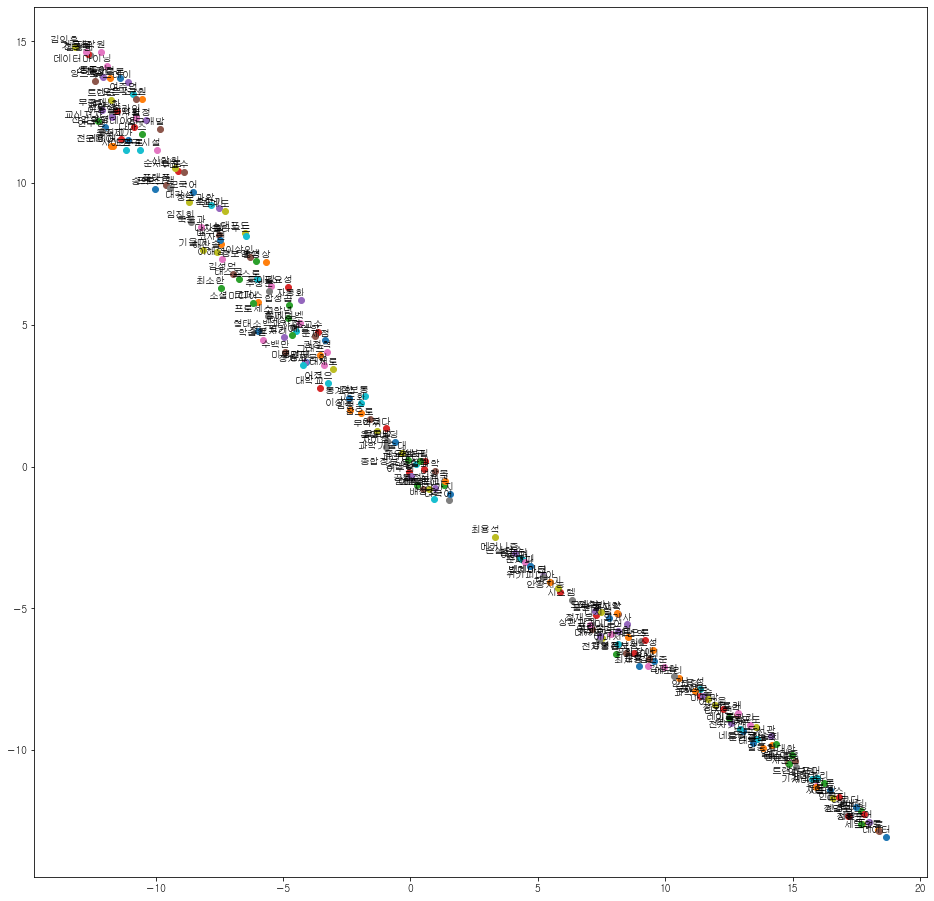

In [274]:
labels = [i for i in model.wv.key_to_index]
tokens = model.wv[labels]
tsne_model = TSNE(n_components=2, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(new_values.shape[0]):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

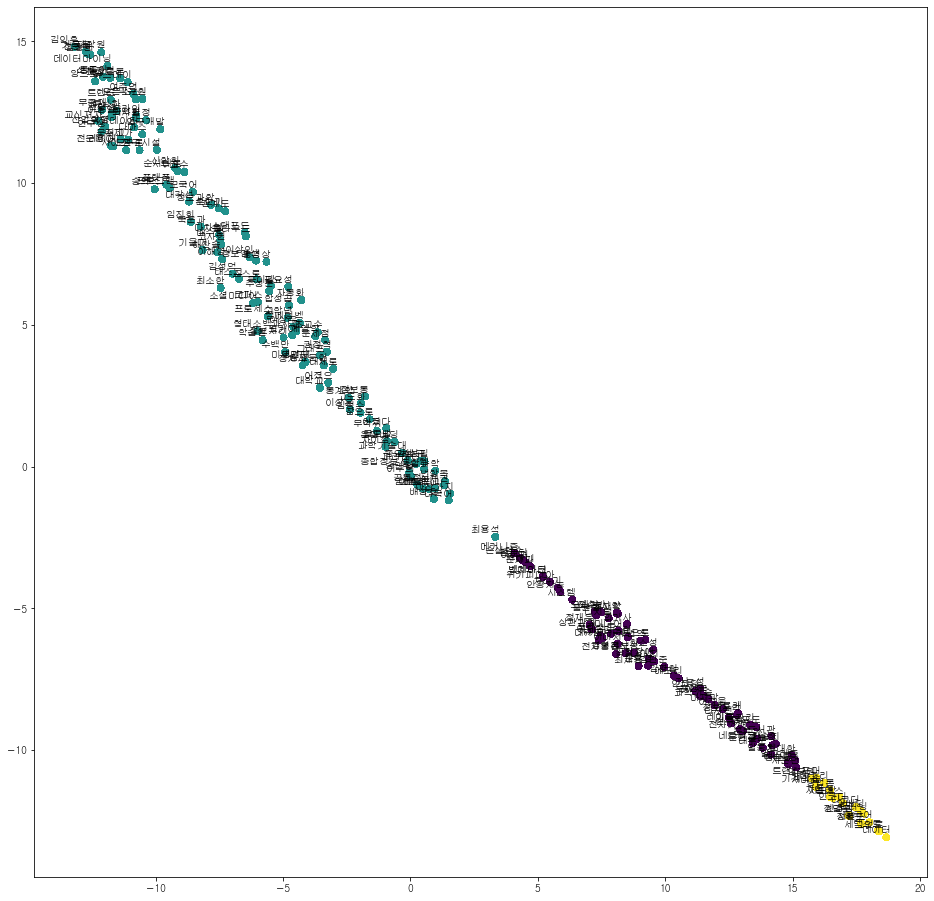

In [275]:
def tsne_plot(model):
    import warnings

    # 경고메세지 끄기
    warnings.filterwarnings(action='ignore')
    
    labels = [i for i in model.wv.key_to_index]
    tokens = model.wv[labels]
    tsne_model = TSNE(n_components=2, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.rcParams['font.family'] = 'Gulim'
        plt.scatter(new_values[:, 0], new_values[:, 1], c=cluster_labels)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

In [218]:
from collections import Counter

d1 = Counter(df['tokenized_op'][0])
d2 = Counter(df['tokenized_op'][1])
d3 = Counter(df['tokenized_op'][2])

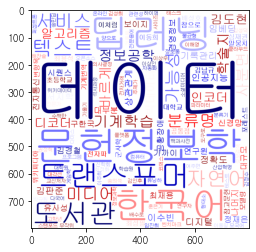

In [222]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
wc = WordCloud(font_path='gulim', 
               width=400, 
               height=400, 
               scale=2.0, 
               max_font_size=200,
               colormap='seismic',
               background_color='white')
gen = wc.generate_from_frequencies(d1)
plt.figure()
plt.imshow(gen)

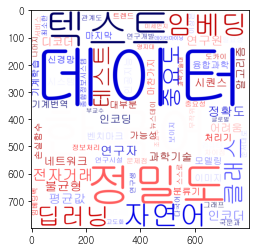

In [223]:
gen = wc.generate_from_frequencies(d2)
plt.figure()
plt.imshow(gen)

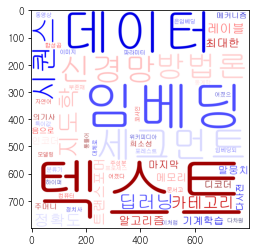

In [224]:
gen = wc.generate_from_frequencies(d3)
plt.figure()
plt.imshow(gen)